In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import keras.metrics
from keras.layers import LeakyReLU
import livelossplot

In [2]:
df = pd.read_csv('./telco.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [5]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### No null values.

### Turn SeniorCitizen to Object

In [6]:
# Apply mapping to the SeniorCitizen column
mapping_dict = {0: 'No', 1: 'Yes'}

df['SeniorCitizen'] = df['SeniorCitizen'].map(mapping_dict)

### Turn TotalCharges into numeric type

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# Check for null values in numeric values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### TotalCharges has 11 null values, which means that there were hidden values that could not be turned into numeric values. This could affect our data exploration and needs to be removed.

In [9]:
# Delete the rows with null values for TotalCharges
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### 11 rows deleted.

### Drop irrelvant columns

#### TotalCharges is considered irrelevant since there is already a MonthlyCharges column and TotalCharges is simply MonthlyCharges*Tenure.

In [11]:
# Drop columns that are irrelevant
columns_to_drop = ['customerID', 'TotalCharges']
df = df.drop(columns_to_drop, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Data Visualisation

### Univariate Analysis of Numerical data (including Tenure, MonthlyCharges)

In [12]:
# numerical
num_df = pd.DataFrame(df[["tenure", "MonthlyCharges"]])
num_df.describe()

tenure  MonthlyCharges
count  7032.000000     7032.000000
mean     32.421786       64.798208
std      24.545260       30.085974
min       1.000000       18.250000
25%       9.000000       35.587500
50%      29.000000       70.350000
75%      55.000000       89.862500
max      72.000000      118.750000

<AxesSubplot:>

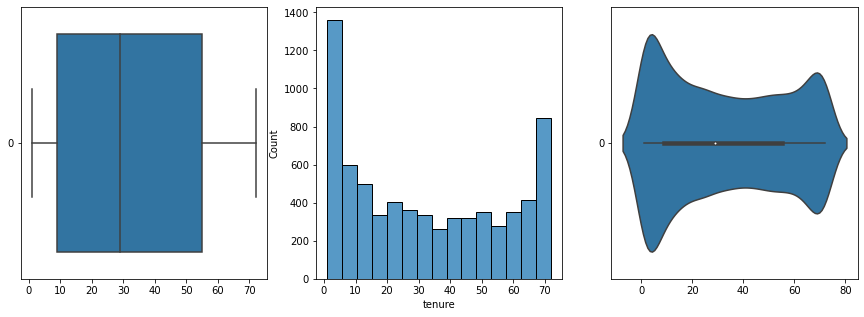

In [13]:
# Tenure distribution
f, axes = plt.subplots(1, 3, figsize=(15, 5))

sb.boxplot(data = df['tenure'], orient = "h", ax = axes[0])
sb.histplot(data = df['tenure'], ax = axes[1])
sb.violinplot(data = df['tenure'], orient = "h", ax = axes[2])

<AxesSubplot:>

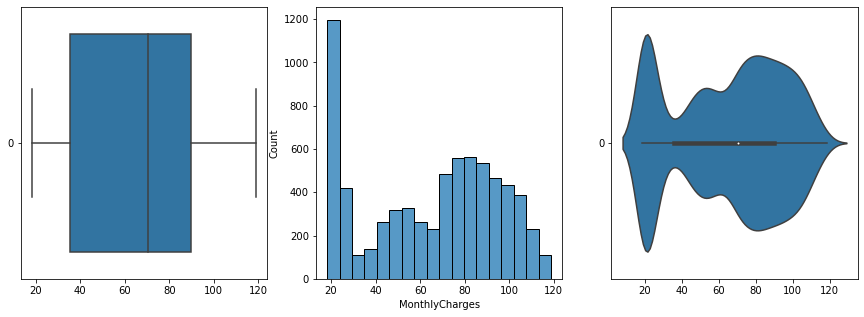

In [14]:
# MonthlyCharges distribution
f, axes = plt.subplots(1, 3, figsize=(15, 5))

sb.boxplot(data = df['MonthlyCharges'], orient = "h", ax = axes[0])
sb.histplot(data = df['MonthlyCharges'], ax = axes[1])
sb.violinplot(data = df['MonthlyCharges'], orient = "h", ax = axes[2])

### Univariate Analysis of Categorical Data (other variables)

In [28]:
categorical_df = df.select_dtypes(include=['object'])

### Customer Attributes

In [29]:
customer_attributes = ["gender", "SeniorCitizen", "Partner" ,"Dependents"]

for i in customer_attributes:
    distribution = df[i].value_counts()
    fig = px.bar(distribution, x=distribution.index, y=distribution.values, color=distribution.index,
                 labels={'x': i, 'y': 'Number'}, title=f'{i} Distribution')
    fig.show()

#### Distribution of gender and partner is the most even.

### Services distribution

In [30]:
# services distribution
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection","TechSupport", "StreamingTV", "StreamingMovies"]
for i in services:
    distribution = df[i].value_counts()
    fig = px.bar(distribution, x=distribution.index, y=distribution.values, color=distribution.index,
                 labels={'x': i, 'y': 'Number'}, title=f'{i} Distribution')
    fig.show()

### Payment-related distribution

In [31]:
# payment 
payment = ["Contract", "PaperlessBilling", "PaymentMethod"]
for i in payment:
    distribution = df[i].value_counts()
    fig = px.bar(distribution, x=distribution.index, y=distribution.values, color=distribution.index,
                 labels={'x': i, 'y': 'Number'}, title=f'{i} Distribution')
    fig.show()

### Churn distribution

In [32]:
labels = ['No', 'Yes']

distribution = df['Churn'].value_counts()

# Plotting the pie chart
fig = px.pie(names=distribution.index, values=distribution.values, title='Churn distribution')
fig.show()

#### Majority of the people stayed within the last month.

### Bivariate Analysis of Numerical Variables (including Tenure, MonthlyCharges) and Churn

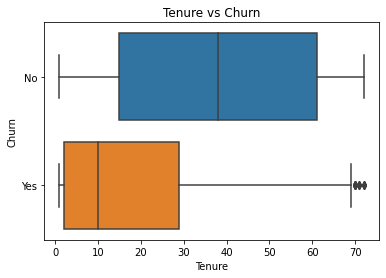

In [33]:
# create box plot for tenure vs churn
sb.boxplot(data=df, x='tenure', y='Churn', orient='h')

plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.title('Tenure vs Churn')

plt.show()

#### New customers are more likely to churn.

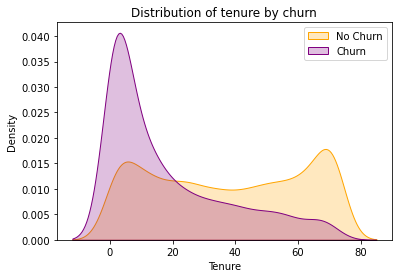

In [34]:
#plot the distribution of monthly charges for churn = no
ax = sb.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="Orange", fill = True);

#plot the distribution of monthly charges for churn = yes
ax = sb.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="Purple", fill= True);

ax.legend(["No Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of tenure by churn');

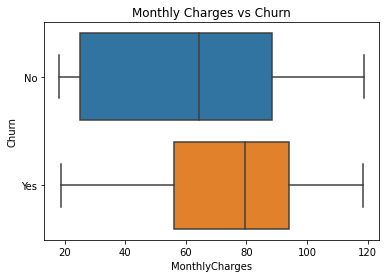

In [35]:
# create box plot for monthly charges vs churn
sb.boxplot(data=df, x='MonthlyCharges', y='Churn', orient='h')

plt.xlabel('MonthlyCharges')
plt.ylabel('Churn')
plt.title('Monthly Charges vs Churn')

plt.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

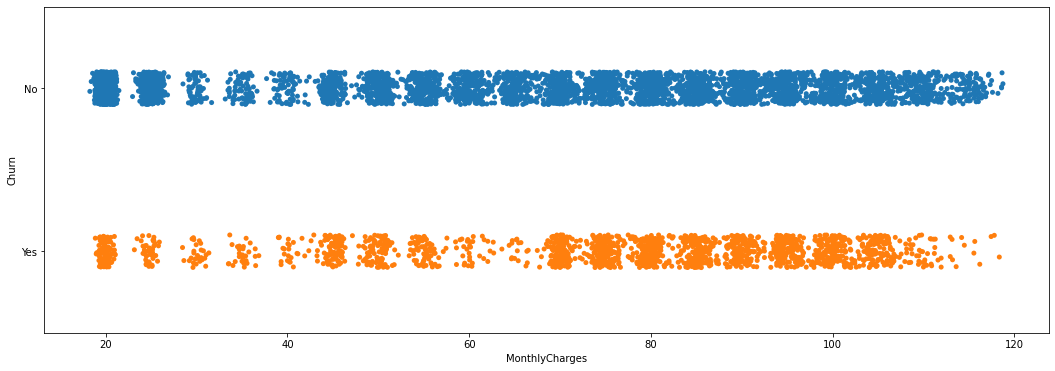

In [36]:
monthly_charges = pd.DataFrame(df['MonthlyCharges'])
churn = pd.DataFrame(df['Churn']) 
# Create a joint dataframe by concatenating monthly charges and churn
chargeDF = pd.concat([monthly_charges, churn], axis = 1).reindex(monthly_charges.index)

# Joint Swarmplot of monthly_charges against churn
f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "MonthlyCharges", y = "Churn", data = chargeDF, orient = "h", size=5, dodge=True)

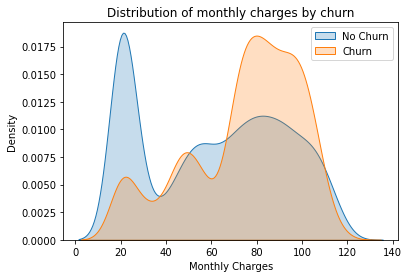

In [37]:
#plot the distribution of monthly charges for churn = no
ax = sb.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                fill = True);

#plot the distribution of monthly charges for churn = yes
ax = sb.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, fill= True);

ax.legend(["No Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

#### Those who had higher monthly charges had a higher probability of churning.

### Bivariate Analysis of Categorical Variables and Churn

In [38]:
chi2_results = {}

for var in [col for col in categorical_df.columns if col != 'Churn']:
    contingency_table = pd.crosstab(categorical_df[var], categorical_df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # p-value < 0.05 to be statistically significant
    chi2_results[var] = {'Chi-square': chi2, 'P-value': p, 'Degrees of freedom': dof}

chi2_results_df = pd.DataFrame(chi2_results).T
chi2_results_df.reset_index(inplace=True)
chi2_results_df.rename(columns={'index': 'Variable'}, inplace=True)

print(chi2_results_df)

            Variable   Chi-square        P-value  Degrees of freedom
0             gender     0.475455   4.904885e-01                 1.0
1      SeniorCitizen   158.440816   2.479256e-36                 1.0
2            Partner   157.503151   3.973798e-36                 1.0
3         Dependents   186.321639   2.019659e-42                 1.0
4       PhoneService     0.873733   3.499240e-01                 1.0
5      MultipleLines    11.271541   3.567927e-03                 2.0
6    InternetService   728.695614  5.831199e-159                 2.0
7     OnlineSecurity   846.677389  1.400687e-184                 2.0
8       OnlineBackup   599.175185  7.776099e-131                 2.0
9   DeviceProtection   555.880327  1.959389e-121                 2.0
10       TechSupport   824.925564  7.407808e-180                 2.0
11       StreamingTV   372.456502   1.324641e-81                 2.0
12   StreamingMovies   374.268432   5.353560e-82                 2.0
13          Contract  1179.545829 

In [39]:
# sort the DataFrame by P-value in ascending order
sorted_chi2_results_df = chi2_results_df.sort_values('P-value', ascending=True)

# Display the sorted DataFrame separately
print("\nSorted by P-value:")
print(sorted_chi2_results_df)


Sorted by P-value:
            Variable   Chi-square        P-value  Degrees of freedom
13          Contract  1179.545829  7.326182e-257                 2.0
7     OnlineSecurity   846.677389  1.400687e-184                 2.0
10       TechSupport   824.925564  7.407808e-180                 2.0
6    InternetService   728.695614  5.831199e-159                 2.0
15     PaymentMethod   645.429900  1.426310e-139                 3.0
8       OnlineBackup   599.175185  7.776099e-131                 2.0
9   DeviceProtection   555.880327  1.959389e-121                 2.0
12   StreamingMovies   374.268432   5.353560e-82                 2.0
11       StreamingTV   372.456502   1.324641e-81                 2.0
14  PaperlessBilling   256.874908   8.236203e-58                 1.0
3         Dependents   186.321639   2.019659e-42                 1.0
1      SeniorCitizen   158.440816   2.479256e-36                 1.0
2            Partner   157.503151   3.973798e-36                 1.0
5      Multipl


##### Most significant variables are Contract, OnlineSecurity, TechSupport, InternetService.

In [40]:
color = {"Female": '#1AC9E6', "Male": '#EB548C'}

fig = px.histogram(df, x="Churn",  title="Churn and Gender distribution", color="gender", color_discrete_map=color)
fig.show()

#### Almost same percentage of each gender who stayed or left.

In [41]:
fig = px.histogram(df, x="Churn", title="Churn and SeniorCitizen distribution", color="SeniorCitizen", color_discrete_map=color)
fig.show()

#### No obvious difference in proportions for no churn and churn (low percentage of senior citizens for both). This is due to the higher proportion of senior citizens in the data.

In [42]:
fig = px.histogram(df, x="Churn", title="Churn and Partner distribution", color="Partner", color_discrete_map=color)
fig.show()

#### Higher percentage of those who left have no partners.

In [43]:
fig = px.histogram(df, x="Churn", title="Churn and Dependents distribution", color="Dependents", color_discrete_map=color)
fig.show()

#### Higher proportion of those who left has no dependents.

In [44]:
fig = px.histogram(df, x="Churn", title="Churn and Phone Service distribution", color="PhoneService", color_discrete_map=color, barmode="group")
fig.show()

#### Both no churn and churn has a higher proportion of people who had phone service.

In [45]:
color = {"Yes": '#1AC9E6', "No": '#EB548C', "No phone service": '#1DE4BD'}
fig = px.histogram(df, x="Churn", title="Churn and Multiple Lines distribution", color="MultipleLines", color_discrete_map=color, barmode="group")
fig.show()

#### Of those who had phone service, a higher proportion does not have multiple lines for no churn. For those who churned, equal proportion of multiple lines and no multiple lines.

In [46]:
color = {"DSL": '#1AC9E6', "Fiber optic": '#EB548C', "No": '#1DE4BD'}
fig = px.histogram(df, x="Churn", title="Churn and Internet Service distribution", color="InternetService", color_discrete_map=color, barmode="group")
fig.show()

#### Those who churned had a significantly smaller proportion of DSL subscription compared to no churn.

In [47]:
color = {"Yes": '#1AC9E6', "No": '#EB548C', "No internet service": '#1DE4BD'}
fig = px.histogram(df, x="Churn", title="Churn and Online Security distribution", color="OnlineSecurity",color_discrete_map=color, barmode="group")
fig.show()

#### Those who churned had a significantly smaller proportion of people with online security.

In [48]:
color = {"Yes": '#1AC9E6', "No": '#EB548C', "No internet service": '#1DE4BD'}
fig = px.histogram(df, x="Churn", title="Churn and Online Backup distribution", color="OnlineBackup", color_discrete_map=color, barmode="group")
fig.show()

#### A smaller proportion of people who churned had online backup.

In [49]:
color = {"Yes": '#1AC9E6', "No": '#EB548C', "No internet service": '#1DE4BD'}
fig = px.histogram(df, x="Churn", title="Churn and Device Protection distribution", color="DeviceProtection", color_discrete_map=color, barmode="group")
fig.show()

#### A smaller proportion of those who churned had device protection.

In [50]:
color = {"Yes": '#1AC9E6', "No": '#EB548C', "No internet service": '#1DE4BD'}
fig = px.histogram(df, x="Churn", title="Churn and Tech Support distribution", color="TechSupport", color_discrete_map=color, barmode="group")
fig.show()

#### Most of those who left did not have tech support.

In [51]:
color = {"Yes": '#1AC9E6', "No": '#EB548C', "No internet service": '#1DE4BD'}
fig = px.histogram(df, x="Churn", title="Churn and Streaming TV distribution", color="StreamingTV", color_discrete_map=color, barmode="group")
fig.show()

#### For those with internet service, not a big difference in streaming TV subscription demographic for churn and no churn.

In [52]:
color = {"Yes": '#1AC9E6', "No": '#EB548C', "No internet service": '#1DE4BD'}
fig = px.histogram(df, x="Churn", title="Churn and Streaming Movies distribution", color="StreamingMovies", color_discrete_map=color, barmode="group")
fig.show()

#### For those with internet service, not a big difference in streaming TV subscription demographic for churn and no churn.

In [53]:
color = {"Month-to-month": '#1AC9E6', "One year": '#EB548C', "Two year": '#1DE4BD'}
fig = px.histogram(df, x="Churn", title="Churn and Contract distribution", color="Contract", color_discrete_map=color, barmode="group")
fig.show()


#### Of those who left, most on them were on month-based contracts.

In [54]:
color = {"Yes": '#1AC9E6', "No": '#EB548C'}
fig = px.histogram(df, x="Churn", title="Churn and Paperless Billing distribution", color="PaperlessBilling", color_discrete_map=color, barmode="group")
fig.show()

#### Those who churned had a very small proportion of people who did not use paperless billing. Whereas, it is quite even for no churn.

In [55]:
color = {"Electronic check": '#1AC9E6', "Mailed check": '#EB548C', "Bank transfer (automatic)": '#1DE4BD', "Credit card (automatic)": '#A685E2'}
fig = px.histogram(df, x="Churn", title="Churn and Payment Method distribution", color="PaymentMethod", color_discrete_map=color, barmode="group")
fig.show()

#### Most of those who churned used electronic check. For no churn, the percentage is similar for all.

### Categorical variables: Contract, OnlineSecurity, TechSupport, InternetService and
### Numerical variables: Tenure 
### have the highest correlation with Churn.

## Data Preprocessing

In [56]:
#Take out the columns that will be used in the ML models
processed_df = df[['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService','tenure','Churn']].copy()

# Contract column do not have the usual Yes/No values, there's no ranking between the different values (each a distinct category)

# Apply one hot encoding to Contract column
contract = pd.get_dummies(processed_df['Contract'], prefix='Contract')
# Remove original Contract column
processed_df.drop('Contract', axis=1, inplace=True)
processed_df = pd.concat([processed_df, contract], axis=1)


# Label encoding function
def label_encode(column):
    if column.dtype == 'object':
        return LabelEncoder().fit_transform(column)
    return column

# Apply the label encoding function to all except the Contract column
processed_df = processed_df.apply(lambda x: label_encode(x))

processed_df.head()

OnlineSecurity  TechSupport  InternetService  tenure  Churn  \
0               0            0                0       1      0   
1               2            0                0      34      0   
2               2            0                0       2      1   
3               2            2                0      45      0   
4               0            0                1       2      1   

   Contract_Month-to-month  Contract_One year  Contract_Two year  
0                        1                  0                  0  
1                        0                  1                  0  
2                        1                  0                  0  
3                        0                  1                  0  
4                        1                  0                  0

In [57]:
# Convert one-hot-encoded values to integer values
processed_df['Contract_Month-to-month'] = processed_df['Contract_Month-to-month'].astype(int)
processed_df['Contract_One year'] = processed_df['Contract_One year'].astype(int)
processed_df['Contract_Two year'] = processed_df['Contract_Two year'].astype(int)

processed_df.head()

OnlineSecurity  TechSupport  InternetService  tenure  Churn  \
0               0            0                0       1      0   
1               2            0                0      34      0   
2               2            0                0       2      1   
3               2            2                0      45      0   
4               0            0                1       2      1   

   Contract_Month-to-month  Contract_One year  Contract_Two year  
0                        1                  0                  0  
1                        0                  1                  0  
2                        1                  0                  0  
3                        0                  1                  0  
4                        1                  0                  0

### Normalisation 

In [58]:
scaler = MinMaxScaler()

# reshape data 
tenure_scaled = scaler.fit_transform(processed_df[['tenure']])

processed_df['tenure'] = tenure_scaled

processed_df.head()

OnlineSecurity  TechSupport  InternetService    tenure  Churn  \
0               0            0                0  0.000000      0   
1               2            0                0  0.464789      0   
2               2            0                0  0.014085      1   
3               2            2                0  0.619718      0   
4               0            0                1  0.014085      1   

   Contract_Month-to-month  Contract_One year  Contract_Two year  
0                        1                  0                  0  
1                        0                  1                  0  
2                        1                  0                  0  
3                        0                  1                  0  
4                        1                  0                  0

In [59]:
# Split train and test data 
x = processed_df.drop(columns = ['Churn'])
y = processed_df['Churn'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42, stratify=y)

## ML Models

#### We used 3 common machine learning classification algorithms to compare their accuracy and evaluate which will be the most suitable one to use 

In [60]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)

predicted_probs = knn_model.predict_proba(x_test)[:, 1]
auc_value = roc_auc_score(y_test, predicted_probs)

print("KNN accuracy:",accuracy_knn)
print(classification_report(y_test, predicted_y))
print("AUC:", auc_value)

KNN accuracy: 0.7770193401592719
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1291
           1       0.60      0.48      0.53       467

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.76      0.78      0.77      1758

AUC: 0.8046556874557346


In [61]:
svc_model = SVC(probability=True)
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)

predicted_probs = svc_model.predict_proba(x_test)[:, 1]
auc_value = roc_auc_score(y_test, predicted_probs)

print("SVM accuracy is :",accuracy_svc)
print(classification_report(y_test, predict_y))
print("AUC:", auc_value)

SVM accuracy is : 0.7821387940841866
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1291
           1       0.62      0.46      0.53       467

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758

AUC: 0.7654159831613028


In [62]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x_train, y_train)
predict_y= model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, predict_y)

predicted_probs = model_rf.predict_proba(x_test)[:, 1]
auc_value = roc_auc_score(y_test, predicted_probs)

print(f'RF accuracy is {accuracy_rf}')
print(classification_report(y_test, predict_y))
print("AUC:", auc_value)

RF accuracy is 0.78839590443686
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1291
           1       0.65      0.45      0.53       467

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.70      1758
weighted avg       0.77      0.79      0.77      1758

AUC: 0.8350165948744146


In [63]:
plot_losses = livelossplot.PlotLossesKeras()

BATCH_SIZE = 300
EPOCHS = 100

NameError: name 'livelossplot' is not defined

In [197]:
print('Train shape:', x_train.shape)
print('Train labels shape:', y_train.shape)
print('Test shape:', x_test.shape)
print('Test labels shape:', y_test.shape)
print('Train labels:', y_train)
print('Test labels:', y_test)

Train shape: (5274, 7)
Train labels shape: (5274,)
Test shape: (1758, 7)
Test labels shape: (1758,)
Train labels: [1 1 0 ... 0 0 1]
Test labels: [1 0 1 ... 0 1 1]


#### We implement a simple 2 layer neural network here , using the LRelu and sigmoid activation functions with 0.1 dropout for regularisation to compare against the machine learning algorithms above. 

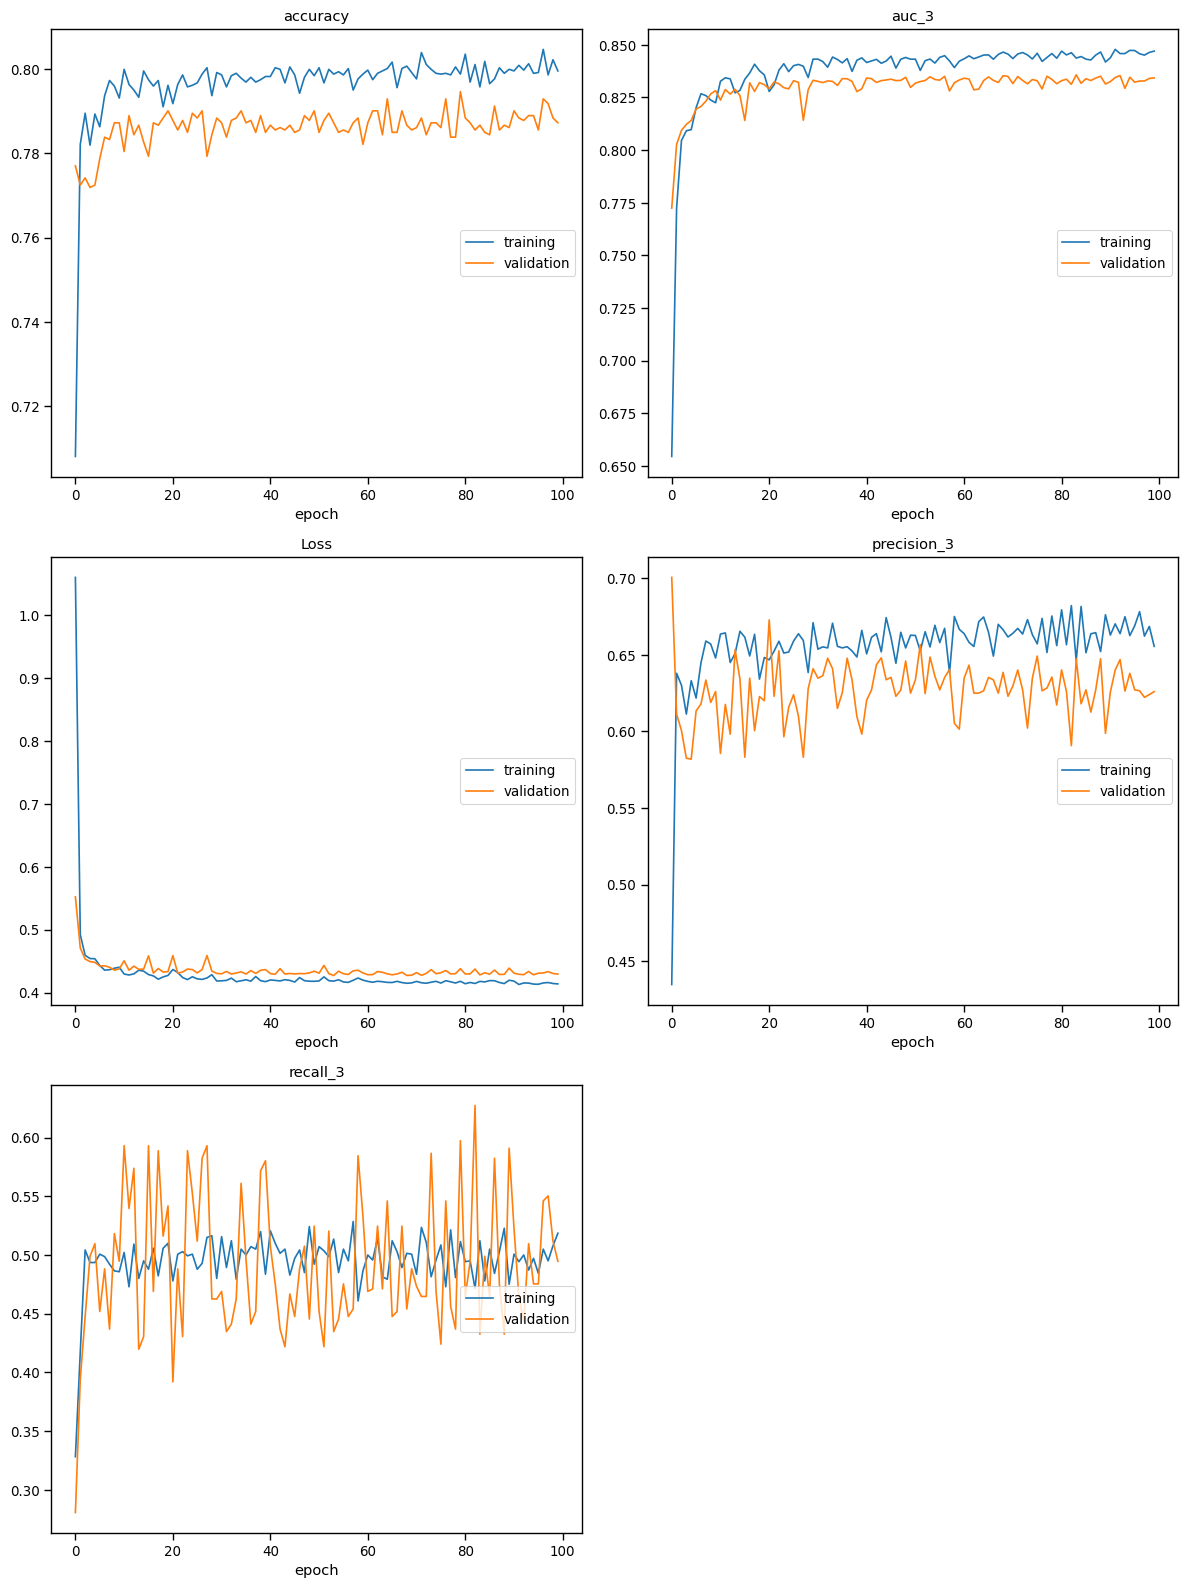

accuracy
	training         	 (min:    0.708, max:    0.805, cur:    0.800)
	validation       	 (min:    0.772, max:    0.795, cur:    0.787)
auc_3
	training         	 (min:    0.654, max:    0.848, cur:    0.847)
	validation       	 (min:    0.772, max:    0.836, cur:    0.834)
Loss
	training         	 (min:    0.413, max:    1.060, cur:    0.414)
	validation       	 (min:    0.427, max:    0.552, cur:    0.429)
precision_3
	training         	 (min:    0.435, max:    0.682, cur:    0.656)
	validation       	 (min:    0.582, max:    0.701, cur:    0.626)
recall_3
	training         	 (min:    0.328, max:    0.529, cur:    0.519)
	validation       	 (min:    0.281, max:    0.627, cur:    0.495)
18/18 - 1s - 33ms/step - accuracy: 0.7996 - auc_3: 0.8470 - loss: 0.4137 - precision_3: 0.6555 - recall_3: 0.5185 - val_accuracy: 0.7873 - val_auc_3: 0.8343 - val_loss: 0.4293 - val_precision_3: 0.6260 - val_recall_3: 0.4946
Test loss: 0.42930325865745544
Test accuracy: 0.7872582674026489
Test reca

In [199]:
# neural network setup
model = Sequential()
model.add(Dense(1024, input_shape=(7,)))
model.add(LeakyReLU(alpha=0.1))  
model.add(Dropout(0.1))
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.1))  
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision(), keras.metrics.AUC()])

# train model
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=[plot_losses],
          verbose=2,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test recall:', score[2])
print('Test precision:', score[3])
print('Test AUC:', score[4])

#### Test loss is the degree of error between predicted values and true values. Lower test loss means better performance.
#### Test accuracy is the proportion of number of correctly predicted test samples out of all the test samples. Higher the test accuracy, the better the model.
#### Precision is the ratio of correctly predicted positive observations to the total predicted positives (TP / TP + FP) and recall is a ratio of correctly predicted observations to all observations that are true (TP / TP + FN). 
#### AUC is a measure of separability between the classes

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


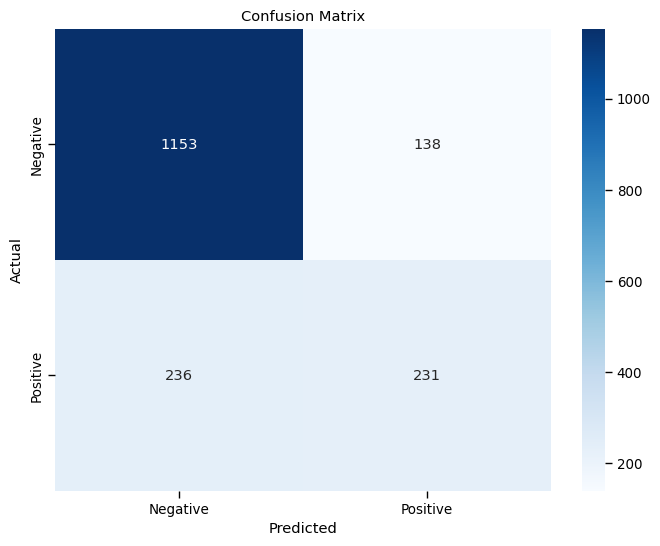

In [200]:
# Predict probabilities for each class for the test set
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels (0 or 1 for binary classification)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [201]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2048)           │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,328,325 (24.14 MB)

 Trainable params: 2,109,441 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,218,884 (16.09 MB)

#### Looking at the metrics for the neural network, it all seems comparable, if not worse to the machine learning algorithms despite our initial assumption that it will do better. We attribute this to 2 reasons. Firstly, our design of the neural network is not complex and much could be done to tune the hyperparameters or improve the architecture. Secondly, neural networks tend to excel with more data and the amount of data here was not big enough. 

#### Overall, the Random Forest Classifier seems to be the best in predicting churn. In context, it may be ideal to have the highest recall since we want to prevent churn and would rather have false positives and this favours the SVM as it has the highest recall. However, its AUC and accuracy is far lower compared to the Random Forest Classifier. This means that the SVM is not able to distinugish between the classes across and might not be as robust as the RFC. Potentially, this means that the SVM could raise too many false positive cases and incur greater costs than the value derived from identifying true positives. Alternatively, we could lower the decision threshold for the RF model (as seen in the cell below). This would increase the recall (by 0.07) to match the SVM at 0.52 at the cost of lower precision (lowered by 0.05), and in context, this may be more desirable. Thus, we believe that the RFC is the best model used to predict churn.

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x_train, y_train)
predict_y= model_rf.predict(x_test)
accuracy_rf = metrics.accuracy_score(y_test, predicted_y)
recall_rf = metrics.recall_score(y_test, predicted_y)
precision_rf = metrics.precision_score(y_test, predicted_y)
auc_value = roc_auc_score(y_test, predicted_probs)

print(f'RF accuracy is {accuracy_rf}')
print(metrics.classification_report(y_test, predicted_y))
print(f'AUC: {auc_value}')